# INVESTIGATE THE PERFORMANCE OF A NUMBER OF MACHINE LEARNING PROCEDURES ON THIS DATASET USING PYTHON/SCIKIT-LEARN.

## DATA PRE-PROCESSING

#### Importing necessary libraries

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('CE802_Ass_Resit.csv')
data

,F1,F2,F3,F4,F5,F6,F7,F8,C
0,1,0.73,14,2.49,2,0.89,1,0.60,True
1,3,0.65,15,1.51,9,0.91,1,0.68,True
2,-10,0.21,39,1.67,5,0.10,1,0.58,True
3,-12,1.45,20,-1.54,9,0.70,1,0.27,True
4,13,0.03,41,2.21,9,0.39,1,1.03,False
...,...,...,...,...,...,...,...,...,...
995,2,1.51,2,-1.76,10,0.74,1,0.09,True
996,-13,0.12,10,2.08,0,0.10,1,0.35,True
997,-10,1.74,4,-2.37,5,0.71,1,0.61,False
998,-18,1.33,66,2.09,4,0.26,1,0.36,True


#### Checking the data types

In [3]:
data.dtypes

F1      int64
F2    float64
F3      int64
F4    float64
F5      int64
F6    float64
F7      int64
F8    float64
C        bool
dtype: object

#### Transfering the data to two numpy arrays, one containing the variables (features) and another the labels (ground truth).

In [4]:
import numpy as np
x = data.loc[:, data.columns != 'C'].to_numpy() #features
y = data.loc[:, data.columns == 'C'].to_numpy() #labels

In [5]:
print(data.shape)

(1000, 9)


In [6]:
print(x.shape, y.shape)

(1000, 8) (1000, 1)


#### Identifying false predictors

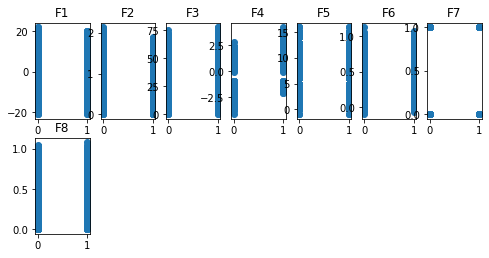

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
for i in range(x.shape[1]):
    plt.subplot(3, 7, i+1)
    plt.scatter(y,x[:,i])
    plt.xticks([0, 1])
    plt.title(data.columns[i])
    # Save the plot as an image file
    plt.savefig('false_predictors.png', dpi=300)

In [8]:
np.sum(np.isnan(x), 0)

array([0, 0, 0, 0, 0, 0, 0, 0])

In [9]:
np.sum(np.isnan(y), 0)

array([0])

From the code above we can see that none of features and the labels had missing values.

#### Convert the label's column vector to a 1d array

In [10]:
y = y.ravel()

#### Scaling the data

In [11]:
scaler = StandardScaler()
X = scaler.fit_transform(x)

#### Identifying Outliers

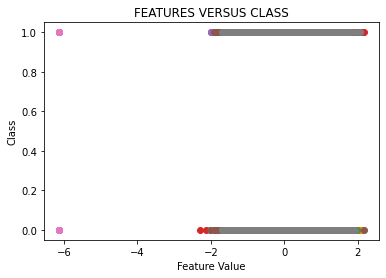

In [12]:
# Create the scatter plot
for i in range(8):
    plt.scatter(X[:, i], y)

# Add a title and axis labels
plt.title('FEATURES VERSUS CLASS')
plt.xlabel('Feature Value')
plt.ylabel('Class')
plt.savefig('featuresversusclass.png', dpi=300)
plt.show()

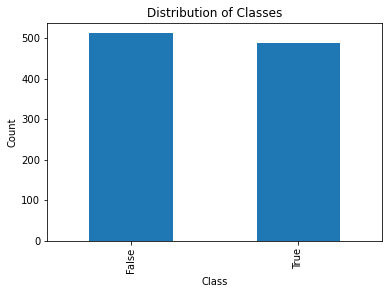

In [13]:
import pandas as pd

# Convert the NumPy array y into a pandas Series
y_series = pd.Series(y)

# Use value_counts() to count unique values and plot a bar chart
y_series.value_counts().plot.bar()

# Add labels and title
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Classes')
plt.show()


### Split the data into training and test sets

In [14]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

## A NAIVE BAYES CLASSIFIER

In [15]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score

# Create a Naive Bayes classifier
clf = GaussianNB()

# Naive Bayes doesn't have hyperparameters to tune with GridSearchCV

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Make predictions using the trained model
naive_bayes_predictions = clf.predict(X_val)

In [16]:
# Calculate accuracy
naive_bayes_accuracy = accuracy_score(y_val, naive_bayes_predictions)
print("Validation accuracy:", naive_bayes_accuracy)

# Calculate precision
naive_bayes_precision = precision_score(y_val, naive_bayes_predictions)
print("Precision:", naive_bayes_precision)

# Calculate recall
naive_bayes_recall = recall_score(y_val, naive_bayes_predictions)
print("Recall:", naive_bayes_recall)

# Calculate F1-score
naive_bayes_f1 = f1_score(y_val, naive_bayes_predictions)
print("F1-score:", naive_bayes_f1)

# Calculate the Cohen's Kappa statistic
naive_bayes_kappa = cohen_kappa_score(y_val, naive_bayes_predictions)
print("Cohen's Kappa:", naive_bayes_kappa)

Validation accuracy: 0.6533333333333333
Precision: 0.6266666666666667
Recall: 0.6619718309859155
F1-score: 0.6438356164383562
Cohen's Kappa: 0.30666666666666664


## DECISION TREES

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Create a Decision Tree classifier
clf = DecisionTreeClassifier(random_state=0)

# Define the parameter grid for grid search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions using the best model
decision_tree_predictions = best_model.predict(X_val)

print("Best parameters:", best_params)


Best parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [18]:
# Calculate accuracy
decision_tree_accuracy = accuracy_score(y_val, decision_tree_predictions)
print("Validation accuracy:", decision_tree_accuracy)

# Calculate precision
decision_tree_precision = precision_score(y_val, decision_tree_predictions)
print("Precision:", decision_tree_precision)

# Calculate recall
decision_tree_recall = recall_score(y_val, decision_tree_predictions)
print("Recall:", decision_tree_recall)

# Calculate F1-score
decision_tree_f1 = f1_score(y_val, decision_tree_predictions)
print("F1-score:", decision_tree_f1)

# Calculate the Cohen's Kappa statistic
decision_tree_kappa = cohen_kappa_score(y_val, decision_tree_predictions)
print("Cohen's Kappa:", decision_tree_kappa)

Validation accuracy: 0.6333333333333333
Precision: 0.6025641025641025
Recall: 0.6619718309859155
F1-score: 0.6308724832214764
Cohen's Kappa: 0.2682277807344332


## SUPPORT VECTOR MACHINES

In [19]:
## SUPPORT VECTOR MACHINES
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Create an SVM classifier
clf = SVC(random_state=0)

# Define the parameter grid for grid search
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions using the best model
svm_predictions = best_model.predict(X_val)


print("Best parameters:", best_params)

Best parameters: {'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}


In [20]:
# Calculate accuracy
svm_accuracy = accuracy_score(y_val, svm_predictions)
print("Validation accuracy:", svm_accuracy)

# Calculate precision
svm_precision = precision_score(y_val, svm_predictions)
print("Precision:", svm_precision)

# Calculate recall
svm_recall = recall_score(y_val, svm_predictions)
print("Recall:", svm_recall)

# Calculate F1-score
svm_f1 = f1_score(y_val, svm_predictions)
print("F1-score:", svm_f1)

# Calculate the Cohen's Kappa statistic
svm_kappa = cohen_kappa_score(y_val, svm_predictions)
print("Cohen's Kappa:", svm_kappa)

Validation accuracy: 0.7933333333333333
Precision: 0.7597402597402597
Recall: 0.823943661971831
F1-score: 0.7905405405405405
Cohen's Kappa: 0.5872536836499201


## LOGISTIC REGRESSIONS

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Create a Logistic Regression classifier
clf = LogisticRegression(max_iter=10000)

# Define the parameter grid for grid search
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions using the best model
logistic_regression_predictions = best_model.predict(X_val)

print("Best parameters:", best_params)

Best parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


/Users/mellogwayo/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
45 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/mellogwayo/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mellogwayo/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mellogwayo/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model

In [22]:
# Calculate accuracy
logistic_regression_accuracy = accuracy_score(y_val, logistic_regression_predictions)
print("Validation accuracy:", logistic_regression_accuracy)

# Calculate precision
logistic_regression_precision = precision_score(y_val, logistic_regression_predictions)
print("Precision:", logistic_regression_precision)

# Calculate recall
logistic_regression_recall = recall_score(y_val, logistic_regression_predictions)
print("Recall:", logistic_regression_recall)

# Calculate F1-score
logistic_regression_f1 = f1_score(y_val, logistic_regression_predictions)
print("F1-score:", logistic_regression_f1)

# Calculate the Cohen's Kappa statistic
logistic_regression_kappa = cohen_kappa_score(y_val, logistic_regression_predictions)
print("Cohen's Kappa:", logistic_regression_kappa)

Validation accuracy: 0.66
Precision: 0.6470588235294118
Recall: 0.6197183098591549
F1-score: 0.6330935251798561
Cohen's Kappa: 0.3165981775951402


In [23]:
import pandas as pd

# Create a dictionary to store the accuracy measures
accuracy_measures = {
    "Classifier": ["Naive Bayes", "Decision Tree", "SVM", "Logistic Regression"],
    "Accuracy": [naive_bayes_accuracy, decision_tree_accuracy, svm_accuracy, logistic_regression_accuracy],
    "Precision": [naive_bayes_precision, decision_tree_precision, svm_precision, logistic_regression_precision],
    "Recall": [naive_bayes_recall, decision_tree_recall, svm_recall, logistic_regression_recall],
    "F1-Score": [naive_bayes_f1, decision_tree_f1, svm_f1, logistic_regression_f1],
    "Cohen's Kappa": [naive_bayes_kappa, decision_tree_kappa, svm_kappa, logistic_regression_kappa]
}

# Create a DataFrame from the dictionary
accuracy_df = pd.DataFrame(accuracy_measures)

# Print the DataFrame
print(accuracy_df)


            Classifier  Accuracy  Precision    Recall  F1-Score  Cohen's Kappa
0          Naive Bayes  0.653333   0.626667  0.661972  0.643836       0.306667
1        Decision Tree  0.633333   0.602564  0.661972  0.630872       0.268228
2                  SVM  0.793333   0.759740  0.823944  0.790541       0.587254
3  Logistic Regression  0.660000   0.647059  0.619718  0.633094       0.316598


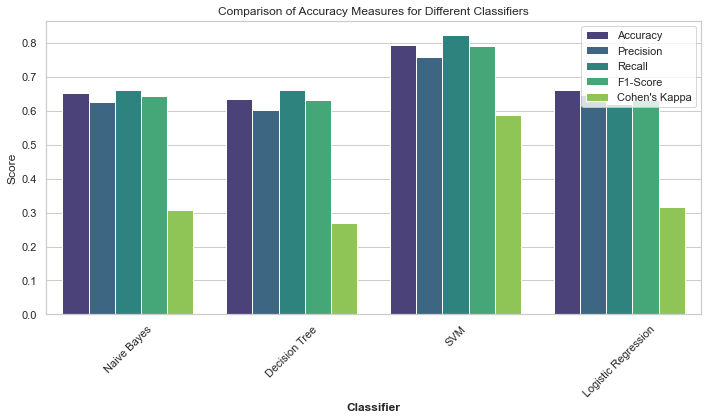

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named accuracy_df

# Set the style of the plot
sns.set(style="whitegrid")

# Melt the DataFrame to create a suitable format for the plot
melted_df = accuracy_df.melt(id_vars='Classifier', var_name='Metric', value_name='Score')

# Create the grouped bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Classifier', y='Score', hue='Metric', data=melted_df, palette='viridis')

# Add labels and title
plt.xlabel('Classifier', fontweight='bold')
plt.ylabel('Score')
plt.title('Comparison of Accuracy Measures for Different Classifiers')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


### support vector machines performed the best 

In [25]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Assuming you have your data and target variables (X and y)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and train an SVM classifier with the best parameters
clf = SVC(C=10, kernel='rbf', degree=2, gamma='scale', probability=True)
clf.fit(X_train, y_train)

# Make predictions on the validation set
predictions = clf.predict(X_val)

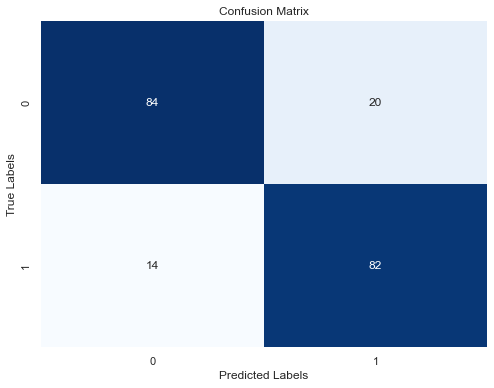

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_val, predictions)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()